In [1]:
import csv
from typing import List, Dict
import pandas as pd

### Qualitative Data Analysis 

In [9]:
df = pd.read_csv("User Study Results.csv")
df.head()

,Informazioni cronologiche,EFFICIENCY OF SEARCHING: I believe that the CA allows me to find recipes that fits my criteria quicker than if I would have manually searched.,"EFFICIENCY OF PLANNING 1: I believe that if I have to plan my weekly diet, the CA is an efficient tool to do so.","EFFICIENCY OF PLANNING 2: I believe that if I have to get a grocery list for my weekly diet, the CA is an efficient tool to do so.",UTILITY 1: the chatbot allows me to find several recipes that fits my interest (question regarding the completeness of the database).,UTILITY 2: I would actually use the chatbot to find recipe when I need to do so.,UTILITY 3: I would actually use the chatbot to plan my weekly diet.,UTILITY 4: I would actually use the chatbot to prepare my grocery list.,COMPLETENESS OF SEARCHING 1: the chatbot does not need to further approaches to get recipes (query the database).,COMPLETENESS OF PLANNING 2: the chatbot does not need to further approaches to support the user in the planning of its weekly diet and related activities,...,"DESIGN LEARNABILITY 1: the first time I used the chatbot, it was easy to understand how to deploy its features","VISUAL DESIGN USABILITY 1: the visual design supported my dialog with the chatbot, and it has never been intrusive.",VISUAL DESIGN USABILITY 2: the visual design facilitated my recipe decision.,VISUAL DESIGN USABILITY 3: the visual design allow me to plan my week and get my recipe in an efficient way,VISUAL DESIGN LIKEABILITY 1: I really liked the aesthetic of the chatbot,VISUAL DESIGN CONSISTENCE 2: each page of the chatbot had a consistent aesthetic with all the others,Q1: What other searching capabilities would you like to have in the application?,Q1: What other planning capabilities would you like to have in the application?,How would you change the aesthetic of the UI?,How would you re-design the interfaces to gain a UI more consistent with the idea of an efficient CA?
0,2023/01/31 2:09:35 PM CET,5 (totally agree),4,4,5 (totally agree),4,4,5 (totally agree),4,5 (totally agree),...,5 (totally agree),5 (totally agree),5 (totally agree),4,5 (totally agree),5 (totally agree),NaN,NaN,NaN,NaN
1,2023/01/31 2:24:36 PM CET,4,4,5 (totally agree),5 (totally agree),3,3,4,4,4,...,5 (totally agree),4,4,4,5 (totally agree),5 (totally agree),I would like this application to display all a...,I believe that this application has no drawbac...,The design of the UI is pretty good. The only ...,Find answer above.
2,2023/01/31 2:31:33 PM CET,4,3,5 (totally agree),4,4,2,3,3,2,...,4,5 (totally agree),3,2,3,4,search by price of all ingerients,hourly planning instead of three options,looks pretty cool,more colors


In [10]:
# removing the interview columns 
df = df.iloc[:, 1:-4]
df.head()

,EFFICIENCY OF SEARCHING: I believe that the CA allows me to find recipes that fits my criteria quicker than if I would have manually searched.,"EFFICIENCY OF PLANNING 1: I believe that if I have to plan my weekly diet, the CA is an efficient tool to do so.","EFFICIENCY OF PLANNING 2: I believe that if I have to get a grocery list for my weekly diet, the CA is an efficient tool to do so.",UTILITY 1: the chatbot allows me to find several recipes that fits my interest (question regarding the completeness of the database).,UTILITY 2: I would actually use the chatbot to find recipe when I need to do so.,UTILITY 3: I would actually use the chatbot to plan my weekly diet.,UTILITY 4: I would actually use the chatbot to prepare my grocery list.,COMPLETENESS OF SEARCHING 1: the chatbot does not need to further approaches to get recipes (query the database).,COMPLETENESS OF PLANNING 2: the chatbot does not need to further approaches to support the user in the planning of its weekly diet and related activities,ROBUSTNESS 1: the chatbot had no problem my utterances,UNDERSTANDING 1: the chatbot always understood the intent behind my utterances.,"DESIGN LEARNABILITY 1: the first time I used the chatbot, it was easy to understand how to deploy its features","VISUAL DESIGN USABILITY 1: the visual design supported my dialog with the chatbot, and it has never been intrusive.",VISUAL DESIGN USABILITY 2: the visual design facilitated my recipe decision.,VISUAL DESIGN USABILITY 3: the visual design allow me to plan my week and get my recipe in an efficient way,VISUAL DESIGN LIKEABILITY 1: I really liked the aesthetic of the chatbot,VISUAL DESIGN CONSISTENCE 2: each page of the chatbot had a consistent aesthetic with all the others
0,5 (totally agree),4,4,5 (totally agree),4,4,5 (totally agree),4,5 (totally agree),3,3,5 (totally agree),5 (totally agree),5 (totally agree),4,5 (totally agree),5 (totally agree)
1,4,4,5 (totally agree),5 (totally agree),3,3,4,4,4,4,4,5 (totally agree),4,4,4,5 (totally agree),5 (totally agree)
2,4,3,5 (totally agree),4,4,2,3,3,2,3,4,4,5 (totally agree),3,2,3,4


In [11]:
# renaming the columns

df.columns = [col.split(":")[0] for col in df.columns]
df.head()

,EFFICIENCY OF SEARCHING,EFFICIENCY OF PLANNING 1,EFFICIENCY OF PLANNING 2,UTILITY 1,UTILITY 2,UTILITY 3,UTILITY 4,COMPLETENESS OF SEARCHING 1,COMPLETENESS OF PLANNING 2,ROBUSTNESS 1,UNDERSTANDING 1,DESIGN LEARNABILITY 1,VISUAL DESIGN USABILITY 1,VISUAL DESIGN USABILITY 2,VISUAL DESIGN USABILITY 3,VISUAL DESIGN LIKEABILITY 1,VISUAL DESIGN CONSISTENCE 2
0,5 (totally agree),4,4,5 (totally agree),4,4,5 (totally agree),4,5 (totally agree),3,3,5 (totally agree),5 (totally agree),5 (totally agree),4,5 (totally agree),5 (totally agree)
1,4,4,5 (totally agree),5 (totally agree),3,3,4,4,4,4,4,5 (totally agree),4,4,4,5 (totally agree),5 (totally agree)
2,4,3,5 (totally agree),4,4,2,3,3,2,3,4,4,5 (totally agree),3,2,3,4


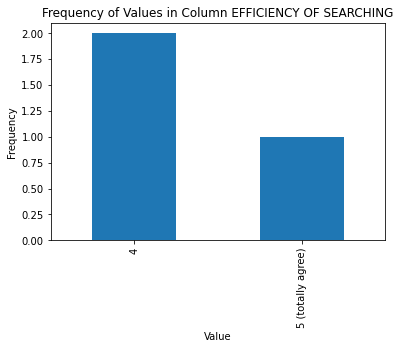

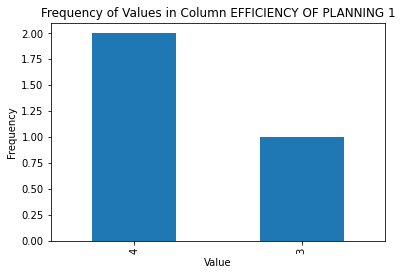

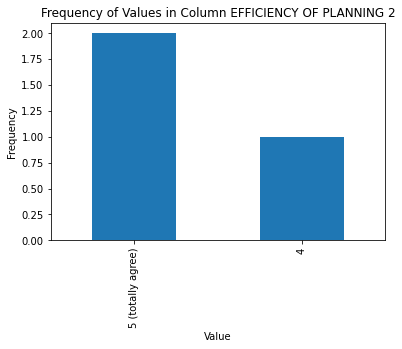

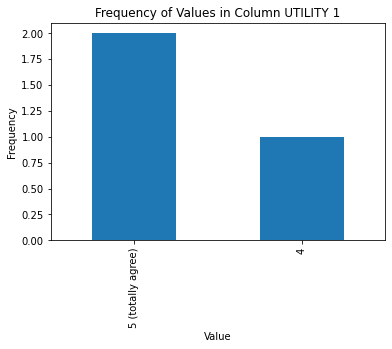

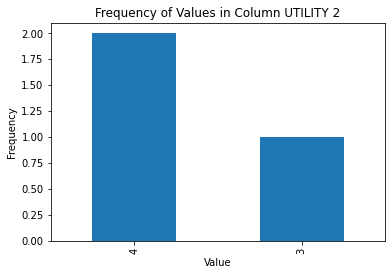

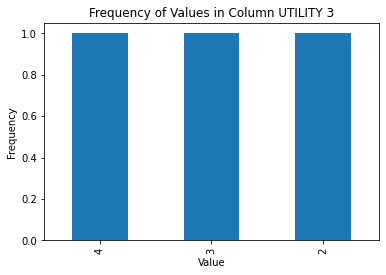

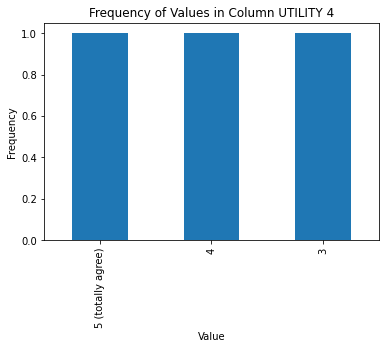

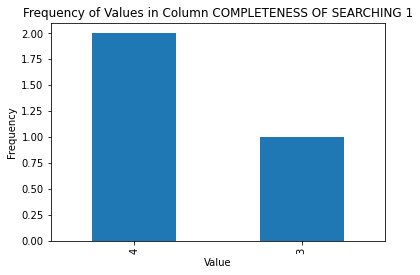

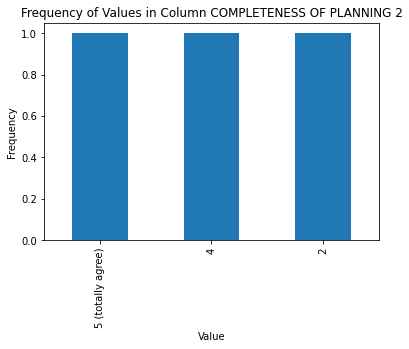

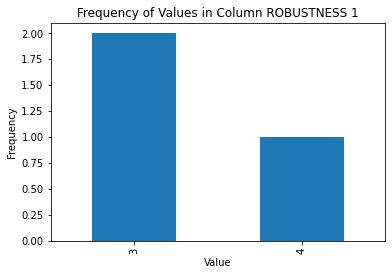

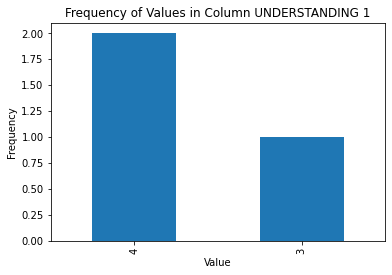

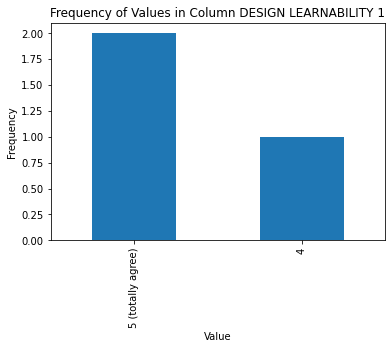

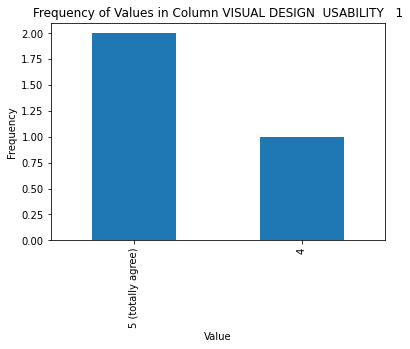

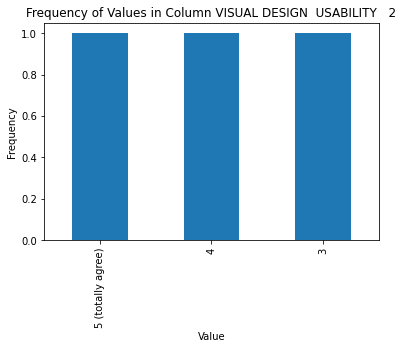

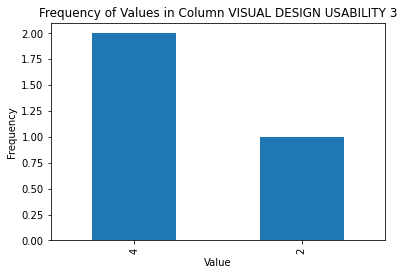

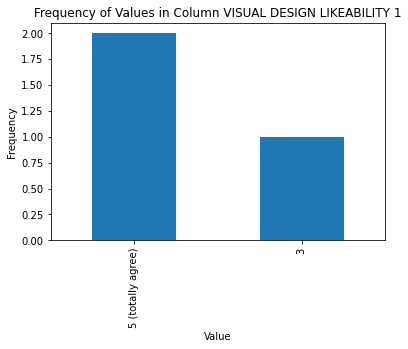

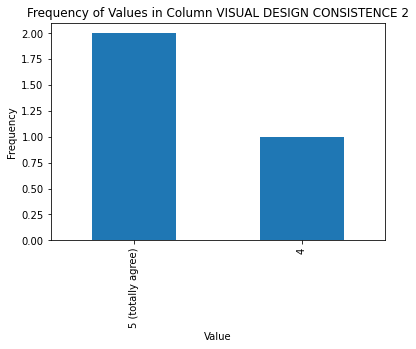

In [19]:
import matplotlib.pyplot as plt
import seaborn
for col in df.columns:
    value_counts = df[col].value_counts()
    value_counts.plot.bar()
    
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title(f"Frequency of Values in Column {col}")
    
    plt.show()

### Quantitative Data Analysis

In [25]:
######## We go throught all txt files from docker console and find the confidence level of each intent detection.

file1 = open("1.txt").readlines()
file2 = open("2.txt").readlines()
file3 = open("3.txt").readlines()
file4 = open("4.txt").readlines()
file5 = open("5.txt").readlines()
file6 = open("6.txt").readlines()
file7 = open("7.txt").readlines()

confidence = []

def get_confidence(txt: str)-> list:
    for line in file1:
    #print(line)
        if "confidence" in line:
            l = line.split()
            x = str(l[len(l)-1])[:-2]
            p = int(x)
            confidence.append(p)
    return confidence

def get_mean(l: list) -> int:
    s = 0
    for i in l:
        s += i
    mean = int(s/len(l))
    return mean

get_confidence(file1)  
get_confidence(file2)  
get_confidence(file3)  
get_confidence(file4)  
get_confidence(file5)  
get_confidence(file6)  
get_confidence(file7)  

def get_mean(confidence):
    length = len(confidence)
    confidence_level = 0
    for level in range(len(confidence)):
        confidence_level += confidence_level
    return confidence_level/length

#get_mean(get_confidence(file2))
a = get_confidence(file1)       
b = get_mean(a)
b
    
 


0.0

In [31]:

def import_csv(path) -> list:
    lines_with_session = []

    with open(path, "r") as f:
        reader = csv.reader(f)
        for row in reader:
            matching = [s for s in row if "inserted 'session" in s]
            if len(matching) > 0:
                matching_str = matching[0]
                session_start = matching_str.index("'session(") + len("'session(")
                session_end = matching_str.index(")'.")
                session = matching_str[session_start:session_end]
                print(session, end= '\n')
                

def ocurrences(path, pattern: str) -> int:
    nb_oc = 0
    with open(path, "r") as f:
        reader = csv.reader(f)
        for row in reader:
            matching = [s for s in row if pattern in s]
            if len(matching) > 0:
                nb_oc += 1
    return nb_oc

    
    
    
ocurrences('/Users/pablogarcia-legaz/Documents/GitHub/MAS_G1/Project Metrics/test1bella.csv', 'b13')

429